# Basic Imports

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# Utils

In [0]:
# Question Filtering Utils

def question_version(df: pd.DataFrame, work: bool) -> pd.DataFrame:
    if not work:
        q1 = df.Q22_1.isna() & df.Q22_2.isna() & df.Q22_3.isna() & df.Q22_4.isna()
        q2 = df.Q29_1.isna() & df.Q29_2.isna() & df.Q29_3.isna() & df.Q29_4.isna()
    if work:
        q1 = df.Q31_1.isna() & df.Q31_2.isna() & df.Q31_3.isna() & df.Q31_4.isna() & df.Q31_5.isna() & df.Q31_6.isna()
        q2 = df.Q32_1.isna() & df.Q32_2.isna() & df.Q32_3.isna() & df.Q32_4.isna() & df.Q32_5.isna() & df.Q32_6.isna()
    return df[q1 & q2]

In [0]:
# Plot Utils

def plot_bar(feat: pd.DataFrame, title: str) -> None:
    val_counter = Counter(feat)
    val_counter = {k: v for k, v in sorted(val_counter.items(), key=lambda item: item[0])}
    df = pd.DataFrame.from_dict(val_counter, orient='index')
    df.plot(kind='bar', legend=False)
    plt.title(title)

# note: this function drops nans
def plot_three_bars(df_col: str, 
                    unemployed: pd.DataFrame, 
                    employed_v1: pd.DataFrame,
                    employed_v2: pd.DataFrame) -> None:
    
    feature = unemployed[df_col].dropna()
    title = f"{question_lookup[df_col]}, unemployed"
    plot_bar(feature, title)

    feature = employed_v1[df_col].dropna()
    title = f"{question_lookup[df_col]}, employed_v1"
    plot_bar(feature, title)

    feature = employed_v2[df_col].dropna()
    title = f"{question_lookup[df_col]}, employed_v2"
    plot_bar(feature, title)    

# Extract Data and Questions

In [0]:
data = pd.read_csv("india_lockdown_survey.csv")
question_list = list(data.loc[0])
data = data.drop(index=[0,1])

In [13]:
question_lookup = {}
print("Questions")
for (i,j) in zip(list(data.columns), question_list):
    question_lookup[i] = j
    print(f"{i}: {j}")

Questions
Duration (in seconds): Duration (in seconds)
Finished: Finished
RecordedDate: Recorded Date
ExternalReference: External Data Reference
UserLanguage: User Language
Q5: What state are you located in?
Q6: What city/region/district are you located in?
Q1: How many individuals do you share a household with?
Q7: How old are you?
Q8: What gender do you most identify with?
Q9: How many individuals over the age of 60 reside in your household?
Q27: Are you employed?
Q10: If you you are employed, what is your occupation?
Q24: Does anyone in your household have a long-term or chronic medical condition, illness or disease (e.g., diabetes, heart conditions, blood pressure, cholesterol)?
Q23: If you know that individuals are following proper social distancing guidelines in their daily lives, how many guests will you invite to your home on a weekly basis?
Q24_1: If your know that individuals are unable to follow proper social distancing guidelines in their daily lives, how many guests will y

# Separate Unemployed, Employed_v1, and Employed_v2

Employed_v2 received the same questions as unemployed (q31, q32), while Employed_v1 received work-specific questions (q22, q29)

In [0]:
# Note that some valid responses simply failed to answer this question; we omit them here for ease of processing
# data[data.Q27.isna()] is how to find them again
unemployed = data[data.Q27 == 'No']
employed = data[data.Q27 == 'Yes']

# Again, this will drop people who didn't answer everything the opposite category from what we're filtering
employed_v1 = question_version(employed, work = True)
employed_v2 = question_version(employed, work = False)

# Plot a few of the categorical features

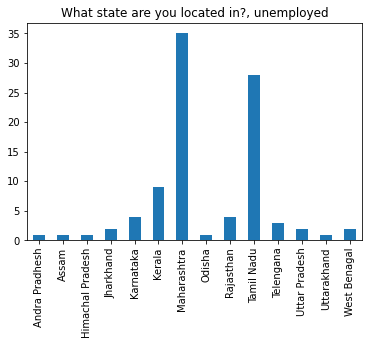

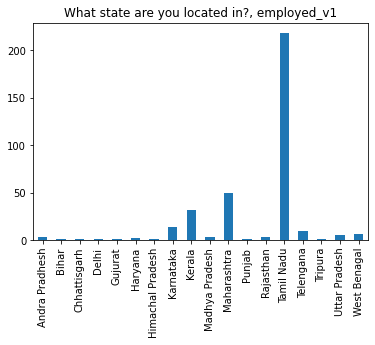

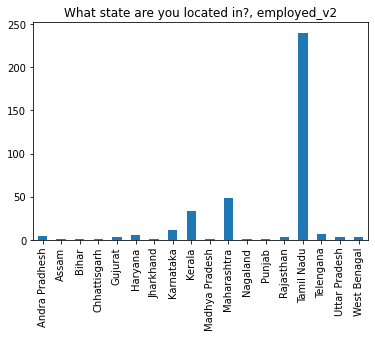

In [15]:
### State Origin
plot_three_bars('Q5', unemployed, employed_v1, employed_v2)    

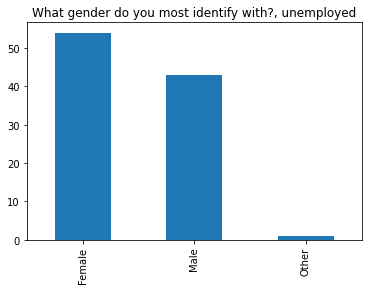

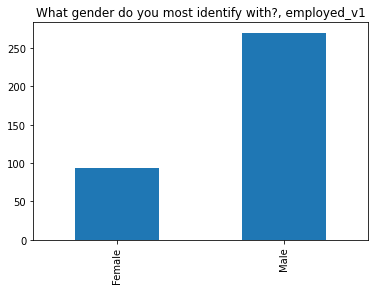

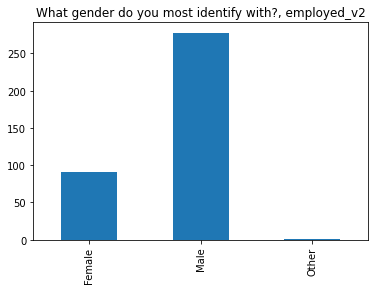

In [16]:
### Gender
plot_three_bars('Q8', unemployed, employed_v1, employed_v2)    

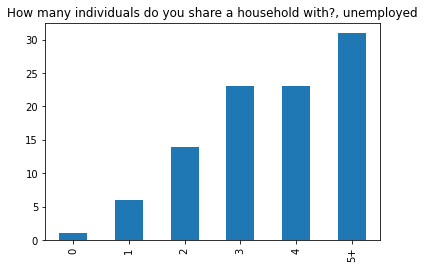

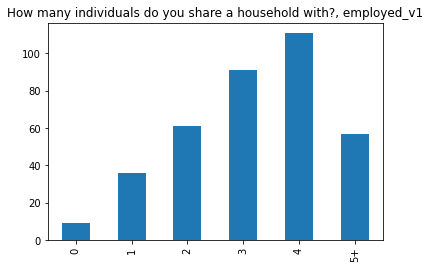

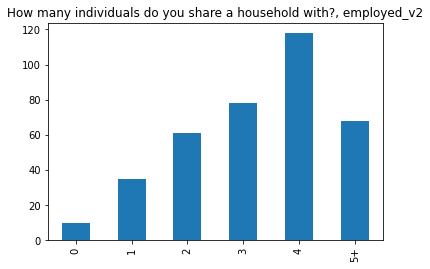

In [17]:
### Household Size
plot_three_bars('Q1', unemployed, employed_v1, employed_v2)    

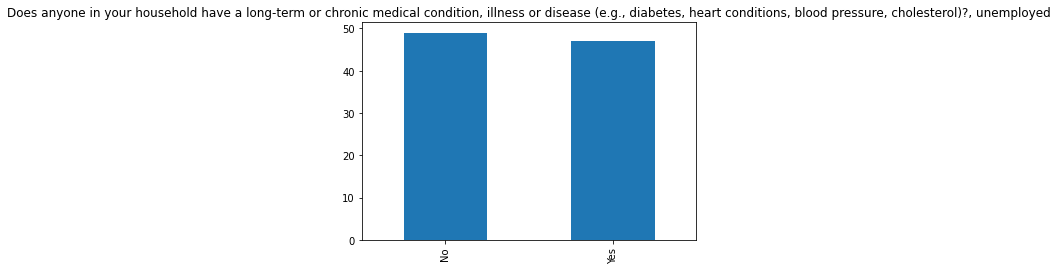

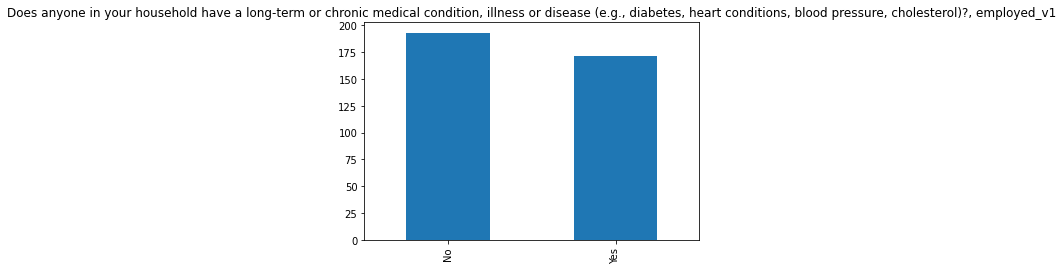

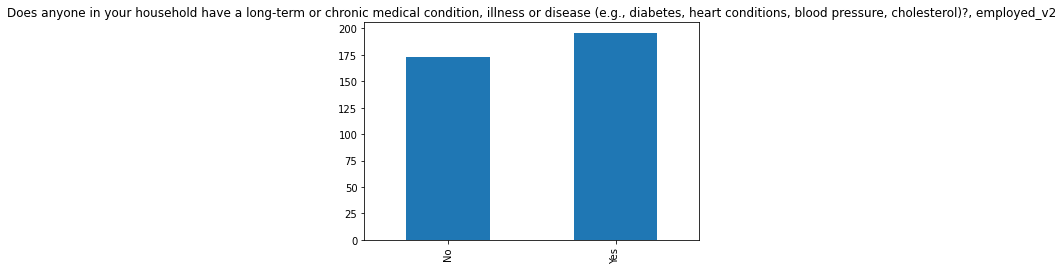

In [18]:
### Existing Conditions
plot_three_bars('Q24', unemployed, employed_v1, employed_v2)    

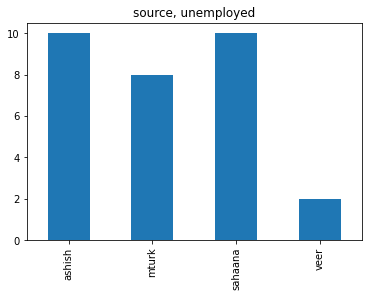

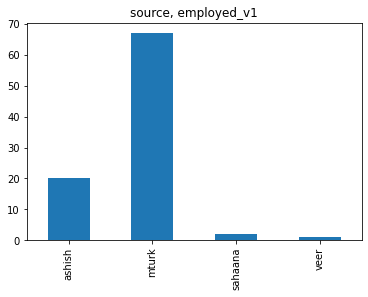

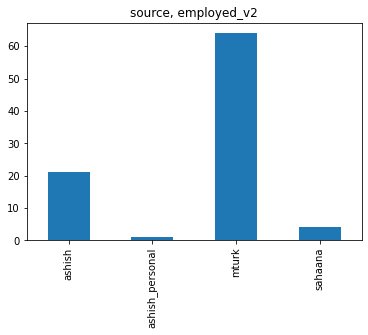

In [19]:
### source
plot_three_bars('source', unemployed, employed_v1, employed_v2)    

# Example: How to plot grid questions

## Plotting Employed Batch 1 Responses

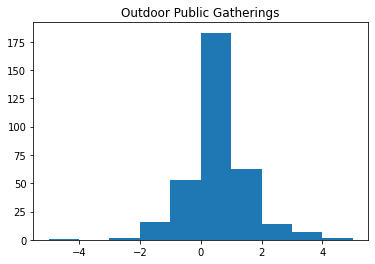

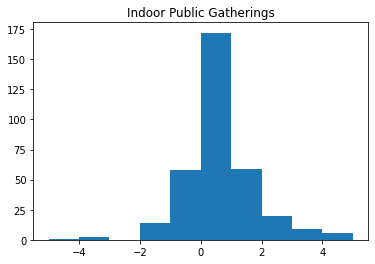

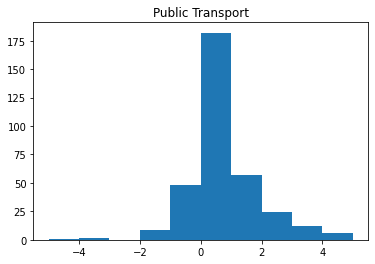

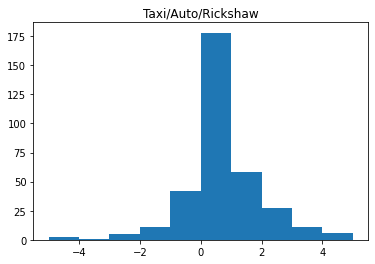

In [20]:
# Plotting difference (social distancing [q22] - pre-covid [q29]) for work-related travel 
# We would expect this to be slightly positive
# Note that all 5+ is converted to 5

q_titles = ['Outdoor Public Gatherings', 'Indoor Public Gatherings', 'Public Transport', 'Taxi/Auto/Rickshaw']
all_vals = employed_v1[['Q22_1','Q22_2','Q22_3','Q22_4',
                        'Q29_1','Q29_2','Q29_3','Q29_4']].dropna().replace('5+','5').astype(int)

social_dist = all_vals[['Q22_1','Q22_2','Q22_3','Q22_4']]
pre_covid = all_vals[['Q29_1','Q29_2','Q29_3','Q29_4']]
difference = pre_covid.to_numpy() - social_dist.to_numpy()

for i in range(len(q_titles)):
    plt.figure()
    plt.hist(difference[:,i])
    plt.title(q_titles[i])

## Plotting Employed Batch 2 Responses

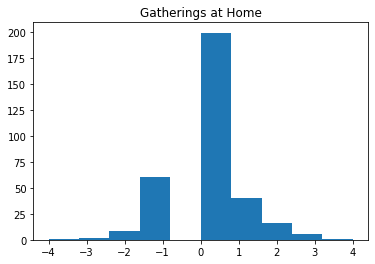

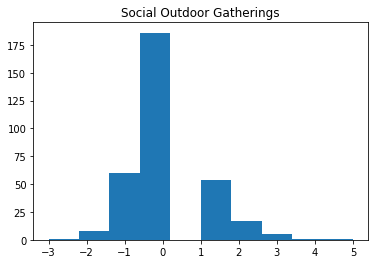

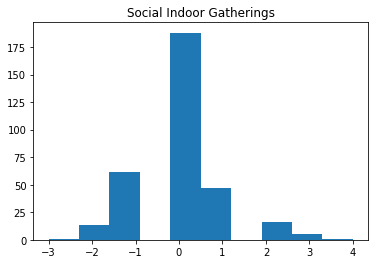

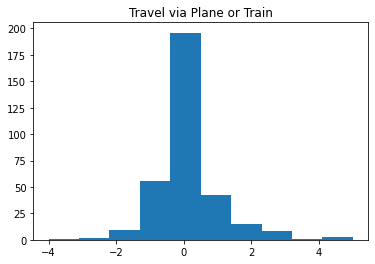

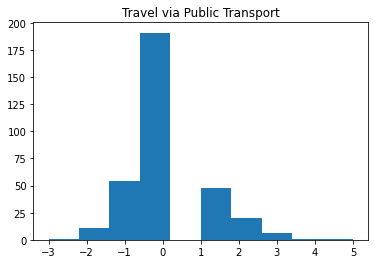

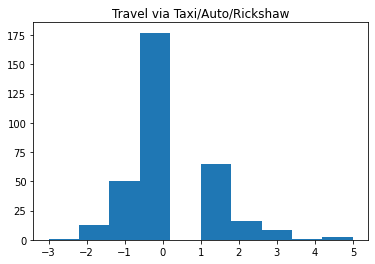

In [23]:
# Plotting difference (social distancing [q22] - pre-covid [q29]) for social travel 
# We would expect this to be slightly positive
# Note that all 5+ is converted to 5

q_titles = ['Gatherings at Home', 'Social Outdoor Gatherings', 'Social Indoor Gatherings', 'Travel via Plane or Train', 'Travel via Public Transport', 'Travel via Taxi/Auto/Rickshaw']
all_vals = employed_v2[['Q31_1','Q31_2','Q31_3','Q31_4', 'Q31_5', 'Q31_6',
                        'Q32_1','Q32_2','Q32_3','Q32_4', 'Q32_5', 'Q32_6']].dropna().replace('5+','5').astype(int)

social_dist = all_vals[['Q31_1','Q31_2','Q31_3','Q31_4', 'Q31_5', 'Q31_6']]
pre_covid = all_vals[['Q32_1','Q32_2','Q32_3','Q32_4', 'Q32_5', 'Q32_6']]
difference = pre_covid.to_numpy() - social_dist.to_numpy()

for i in range(len(q_titles)):
    plt.figure()
    plt.hist(difference[:,i])
    plt.title(q_titles[i])

## Plotting Unemployed Responses

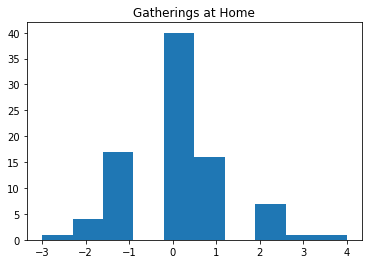

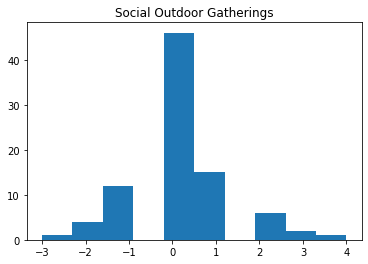

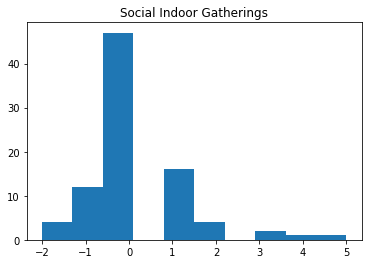

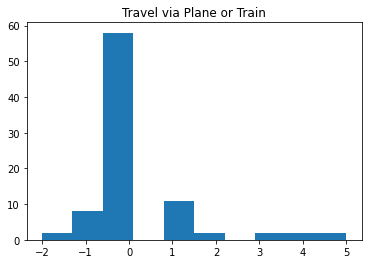

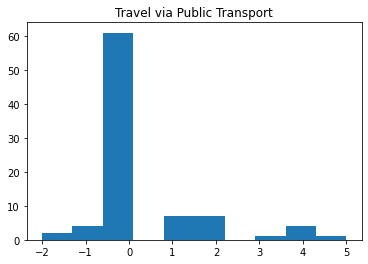

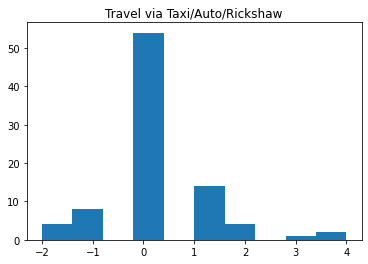

In [24]:
# Plotting difference (social distancing [q31] - pre-covid [q32]) for social travel 
# We would expect this to be slightly positive
# Note that all 5+ is converted to 5

q_titles = ['Gatherings at Home', 'Social Outdoor Gatherings', 'Social Indoor Gatherings', 'Travel via Plane or Train', 'Travel via Public Transport', 'Travel via Taxi/Auto/Rickshaw']
all_vals = unemployed[['Q31_1','Q31_2','Q31_3','Q31_4', 'Q31_5', 'Q31_6',
                        'Q32_1','Q32_2','Q32_3','Q32_4', 'Q32_5', 'Q32_6']].dropna().replace('5+','5').astype(int)

social_dist = all_vals[['Q31_1','Q31_2','Q31_3','Q31_4', 'Q31_5', 'Q31_6']]
pre_covid = all_vals[['Q32_1','Q32_2','Q32_3','Q32_4', 'Q32_5', 'Q32_6']]
difference = pre_covid.to_numpy() - social_dist.to_numpy()

for i in range(len(q_titles)):
    plt.figure()
    plt.hist(difference[:,i])
    plt.title(q_titles[i])